# Esercizio 3

In questa esercitazione si vuole simulare l'evoluzione di un _asset price_ in un fissato periodo di tempo, con l'obiettivo di calcolare il prezzo di un'opzione di _call_ o di _put_ di tipo europeo. 

Le opzioni europee funzionano nel modo seguente: il venditore dell'opzione (_writer_) concede all'acquirente (_holder_) il __diritto__ di comprare (opzione di _call_) o vendere (opzione di _put_) ad un predeterminato prezzo d'esercizio $K$ (o _strike price_) un titolo (il _sottostante_ o _underlying_) in un certo tempo futuro $T$. Al momento di esercitare il proprio diritto, l'acquirente sceglie se vendere o aquistare solo se ne ricaverebbe profitto. Il profitto dell'acquirente è ($S(t)$ è il prezzo del sottostante):
* $\max\{0, S(T) - K\}$ per l'opzione di call (l'acquirente ottiene un titolo che vale più del suo prezzo);
* $\max\{0, K - S(T)\}$ per l'opzione di put (l'acquirente vende un titolo che vale meno del suo prezzo).

Tuttavia, col tempo al sottostante viene applicato un interesse con tasso $r$, perciò bisogna ridurre di un fattore $e^{-rt}$ il profitto.

Il problema è decidere in anticipo un prezzo per l'opzione. L'_holder_ deve tenere conto della possibile fluttuazione del prezzo del sottostante e degli interessi. Il modello di Black-Scholes, che suppone un andamento dei prezzi secondo un moto browniano geometrico, fornisce una risposta al problema.

Se $r$ è il tasso di interesse e $\sigma$ la volatilità, la soluzione analitica per i prezzi delle opzioni è la seguente:
- Prezzo dell'opzione di _call_:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Prezzo dell'opzione di _put_:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la funzione cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

Vogliamo qui mostrare che è possibile ottenere una stima del prezzo dell'opzione senza usare la soluzione analitica, ma un metodo monecarlo. Se $S(t)$ segue l'andamento di un moto browniano geometrico con _drift_ $\mu$ e volatilità $\sigma$, il prezzo dell'opzione è ragionevole che sia deciso dalle formula per il profitto scritte sopra. La media eseguita su $M$ esperimenti è la stima per il prezzo dell'opzione.

Posto $M = 50000$, eseguiremo due diverse simulazioni; in una il valore $S(T)$ viene campionato direttamente dal moto browniano, nell'altra viene campionato partendo da $t = 0$ per mezzo di $100$ passi. Poiché per un moto browniano non importa la densità del campionamento, ci aspettiamo che le medie finali non si discostano troppo tra di loro.

In [26]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call_ex, put_ex = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call_ex)
    print("put: ", put_ex)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


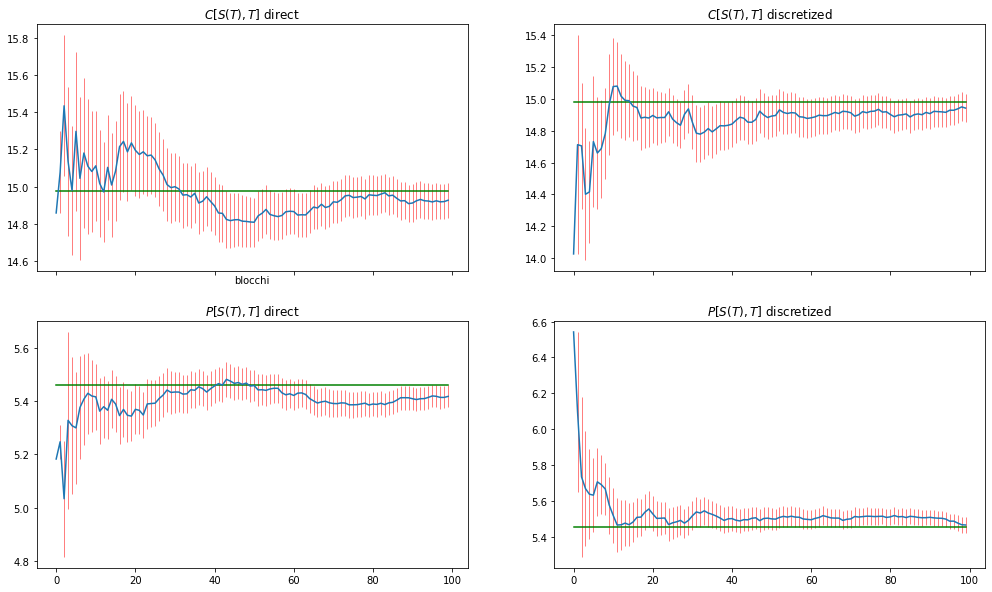

Call option price - diretto = 14.9267 +- 0.093101
Call option price - discretizzato = 14.9406 +- 0.0899808
Put option price - diretto = 5.41793 +- 0.0410926
Put option price - discretizzato = 5.46814 +- 0.0432394


In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, call, errcall, put, errput = np.loadtxt("ES_03_1.dat", usecols=(0,1,2,3,4), delimiter=',', unpack='true')
x, call100, errcall100, put100, errput100 = np.loadtxt("ES_03_100.dat", usecols=(0,1,2,3,4), delimiter=',', unpack='true')

fig, ((pcall_direct,pcall_disc), (pput_direct,pput_disc)) = plt.subplots(2,2, sharex = True)
fig.set_figheight(10)
fig.set_figwidth(17)

pcall_direct.errorbar(x,call, yerr = errcall, ecolor = "red", elinewidth=0.5); pcall_direct.title.set_text("$C[S(T),T]$ direct")
pcall_direct.plot(x, call_ex*np.ones(len(x)), 'g')
pcall_direct.set_xlabel("blocchi")
pcall_disc.errorbar(x,call100, yerr = errcall100, ecolor = "red", elinewidth=0.5); pcall_disc.title.set_text("$C[S(T),T]$ discretized")
pcall_disc.plot(x, call_ex*np.ones(len(x)), 'g')
pcall_direct.set_xlabel("blocchi")
pput_direct.errorbar(x,put, yerr = errput, ecolor = "red", elinewidth=0.5); pput_direct.title.set_text("$P[S(T),T]$ direct")
pput_direct.plot(x, put_ex*np.ones(len(x)), 'g')
pcall_direct.set_xlabel("blocchi")
pput_disc.errorbar(x,put100, yerr = errput100, ecolor = "red", elinewidth=0.5); pput_disc.title.set_text("$P[S(T),T]$ discretized")
pput_disc.plot(x, put_ex*np.ones(len(x)), 'g')
pcall_direct.set_xlabel("blocchi")

plt.show()

print("Call option price - diretto = " + str(call[-1]) + " +- " + str(errcall[-1]))
print("Call option price - discretizzato = " + str(call100[-1]) + " +- " + str(errcall100[-1]))
print("Put option price - diretto = " + str(put[-1]) + " +- " + str(errput[-1]))
print("Put option price - discretizzato = " + str(put100[-1]) + " +- " + str(errput100[-1]))

In tutti i casi i prezzi delle opzioni ottenti sono compatibili con quelli previsti dal modello Black-Scholes.